# Best Neighborhood in Pittsburgh...?

## Introduction:

This small project aims to use a simple metric to make an informed and comprehensive analysis of the various neighborhoods in Pittsburgh to ultimately determine which neighborhood is the best, utilizing Python *pandas dataframes* and geopandas as the primary tools for data analysis.

## Metric:

My metric to determine which neighborhood is the best in Pittsburgh is **Bus Stops**. In order to comprehensively evaluate this and analyze this, I will be comparing both Bus Stop *Density* and Bus Stop *Usage* for each neighborhood. For the former I will pull data from the Port Authority Transit Stops dataset. For the latter I will analyze data from the Bus Stop Usage dataset and Port Authority Monthly Average Ridership dataset. The scoring table will be similar to the following:

| Neighborhood      | Bus Stop Density  | Bus Stop Usage |              | 
| ----------------- | ----------------- | -------------- | ------------ |
| Westwood          |                   |                |              |
| 31st ward         |                   |                |              |
| Arlington         |                   |                |              |
| Allegheny Center  |                   |                |              |
| Allegheny West    |                   |                |              |
| ...               |                   |                |              |
| Woods Run- Halls Grove |              |                |              |

As you can tell, there will be some difficulties in deciding which neighborhood really is the best neighborhood just from looking at this table alone! How are we going to decide *whether* and *when* Bus Stop Density should outweigh Bus Stop Usage, and vice versa? And **how** do we even calculate Bus Stop Density, if we are not immediately given the numbers? Let's dive into the data to find out!

## Best Neighborhood:

Section in progress!

## Conclusion:

Section in progress!

# Data Analysis

Let's dive into the data analysis! First, we need to load the data, and we will do so by first **streaming** the relevant data from the WPRDC website. Let's take a look at both the data *dictionary* (which gives us useful information about the dataset fields) and the dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# dictionary
dictTS  = pd.read_csv("https://data.wprdc.org/datastore/dump/0a26e18e-f78b-43d2-8c75-2498ae255ecf")

# display first 5 results of salary2016 df
dictTS

,Field,Description
0,InternalID,ID
1,Name,Stop Name
2,ExternalID,External ID
3,Direction,Direction
4,Lat,Latitude (y Coordinate)
5,Long,Longitude (x coordinate)
6,Time_Point,Is this stop a time point?
7,NewZone,New Fare Zone
8,No_Rts_Ser,Routes served by this stop
9,Routes_161,Routes


In [6]:
mapTS = gpd.read_file("transit_stops/PAAC_Stops_1909.shp") # read in the shapefile

mapTS.head()

,StopID,Stop_name,CleverID,Direction,Timepoint,Routes_ser,Routes_cou,Latitude,Longitude,Mode,Shelter,Stop_type,On_avwk_FY,Off_avwk_F,On_avwk__1,Off_avwk_1,AvgWkdy_De,geometry
0,E00175,26TH ST AT PENN AVE FS (SPRING WAY),2593.0,Inbound,N,"54, 88, 91",3.0,40.454635,-79.978170,Bus,No Shelter,Bus Stop,34.531580,43.900523,35,44,0.03,POINT (1348499.759 416298.200)
1,E00180,28TH ST AT LIBERTY AVE,2161.0,Inbound,N,54,1.0,40.456288,-79.974651,Bus,No Shelter,Bus Stop,1.304759,10.216890,1,10,0.03,POINT (1349493.900 416875.511)
2,E00270,32ND ST AT SPRING WAY,2410.0,Outbound,N,"54, 88, 91",3.0,40.460347,-79.969436,Bus,No Shelter,Bus Stop,13.184478,33.410865,13,33,0.04,POINT (1350981.820 418317.228)
3,E00420,40TH ST AT BUTLER ST,1199.0,Outbound,N,93,1.0,40.468655,-79.962115,Bus,No Shelter,Bus Stop,1.038249,28.682688,1,29,0.05,POINT (1353094.135 421291.781)
4,E00430,40TH ST AT DAVIDSON ST FS,20106.0,Outbound,N,93,1.0,40.467676,-79.960929,Bus,No Shelter,Bus Stop,0.163421,12.588603,0,13,0.00,POINT (1353415.081 420926.980)


In [7]:
mapTS[['Stop_name', 'Latitude','Longitude','geometry']]

,Stop_name,Latitude,Longitude,geometry
0,26TH ST AT PENN AVE FS (SPRING WAY),40.454635,-79.978170,POINT (1348499.759 416298.200)
1,28TH ST AT LIBERTY AVE,40.456288,-79.974651,POINT (1349493.900 416875.511)
2,32ND ST AT SPRING WAY,40.460347,-79.969436,POINT (1350981.820 418317.228)
3,40TH ST AT BUTLER ST,40.468655,-79.962115,POINT (1353094.135 421291.781)
4,40TH ST AT DAVIDSON ST FS,40.467676,-79.960929,POINT (1353415.081 420926.980)
...,...,...,...,...
6941,WASHINGTON RD AT CONSOL DR FS,40.345641,-80.057725,POINT (1325330.634 377174.082)
6942,VILLAGE DR AT WASHINGTON RD FS,40.342759,-80.059715,POINT (1324748.686 376139.046)
6943,SHIRE PL AT BREINING ST,40.388372,-80.007092,POINT (1339836.900 392370.971)
6944,KANE BLVD AT BOWER HILL RD,40.371747,-80.082735,POINT (1318613.074 386864.171)


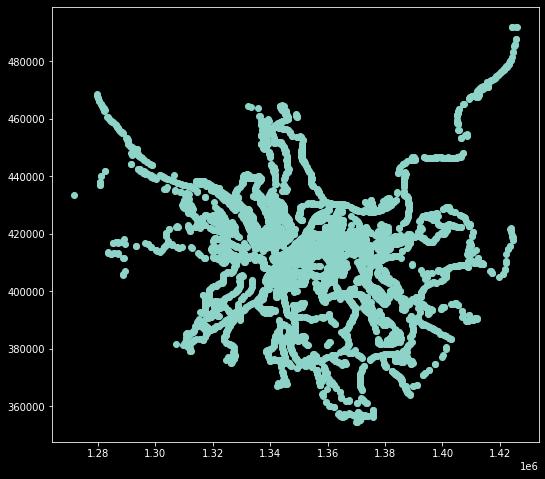

In [8]:
# filter out non-"Bus Stops"
mapTS = mapTS[mapTS["Stop_type"] == "Bus Stop"]

plt.style.use('dark_background')
mapTS.plot(figsize=(12,8)) # plot the geopandas dataframe

**GEOPANDAS HERE** to show shapefile, map, and then using Pittsburgh neighborhoods shapefile to analyze the cutoffs and categorize, then count and divide by area to get density.

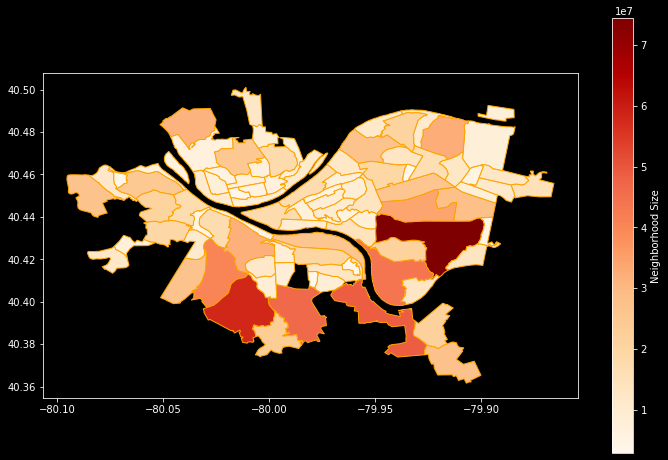

In [9]:
# load neighborhoods location data
neighborhoods = gpd.read_file("neighborhoods/Neighborhoods_.shp") # read in the shapefile

neighborhoods.plot(column='area', 
                   cmap='OrRd', 
                   edgecolor='orange', 
                   legend=True,
                   legend_kwds={'label':'Neighborhood Size'},
                   figsize=(12,8)) # plot the geopandas dataframe

In [10]:
neighborhoods[['hood', 'area', 'perimeter', 'geometry']]

,hood,area,perimeter,geometry
0,Central Oakland,7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
...,...,...,...,...
85,Ridgemont,10278895.0,16268.131,"POLYGON ((-80.03431 40.43366, -80.03424 40.433..."
86,West End,5579501.0,18776.656,"POLYGON ((-80.02869 40.44454, -80.02845 40.444..."
87,California-Kirkbride,6050988.0,11711.301,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
88,Glen Hazel,12713036.0,18931.703,"POLYGON ((-79.92030 40.41205, -79.92027 40.412..."


We want to classify the bus stops into their respective neighborhoods. Let's use the **shapely** library's *Point* and *Polygon* classes.

In [11]:
from shapely.geometry import Point, Polygon
import geopandas.tools

# for each bus stop
    # for each neighborhood


# mapTS.loc[0,'geometry'].intersects(neighborhoods.loc[0, 'geometry'])

False

In [58]:
TShood = mapTS.merge(neighborhoods, how='left', 
                            left_on='geometry', 
                            right_on='geometry')

TShood[['hood','geometry']]
TSmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

*Now we load the remaining data we need.

In [23]:
# load 2017 salary data
salary2017 = pd.read_csv("https://data.wprdc.org/datastore/dump/4d09cd16-3e45-4d71-9607-40b545457cb7")

# load 2018 salary data
salary2018 = pd.read_csv("https://data.wprdc.org/datastore/dump/8f5d74ba-b011-4a34-91a9-24f9c7447491")

Let's do a preliminary analysis on the three yearly datasets looking only at annual salary. Since our main goal is to evaluate the metric for the different neighborhoods in Pittsburgh, let's separate our data based on neighborhood.